In [11]:
import pandas as pd
from langchain.llms import CerebriumAI
from langchain import LLMChain
from langchain import PromptTemplate
import numpy as np

access_token='public-c2ac746ced681ef605f7'
import os
os.environ["CEREBRIUMAI_API_KEY"] = access_token

## Data Loading https://github.com/MiriamSchirmer/genocide-transcript-corpus

In [39]:
df = pd.read_csv('/home/maria/Documents/genocide-transcript-corpus/genocide-transcript-corpus-v11.csv')

In [8]:
df.head()

,Unnamed: 0,paragraph,label,tribunal,witness,document,case,date
0,1,June Before the Judges NIL Nonn Presiding Si...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
1,2,pag e Questioning by Mr Kar Savuth commenc es ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
2,3,decision on the removal of witnesses from the ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
3,4,The defence agreed with the Chambers proposal ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
4,5,therefore be in a position to compare them wit...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009


## Defining the prompt template and model

In [3]:
#Define prompt
template = """
Does this text contain violence? {text}
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)

llm=CerebriumAI(endpoint_url="https://run.cerebrium.ai/flan-t5-xl-webhook/predict")

llm_chain = LLMChain(llm=llm, prompt=prompt)

## Classify each entry in dataframe using model

In [4]:
def generate_violence_classifications(llm_chain,df):
    llm_classification=[]
    for i in range(0,len(df)):
        classific=llm_chain(df.iloc[i,1])['text']
        llm_classification.append(classific)
    return llm_classification
        
llm_classification=generate_violence_classifications(llm_chain,df)

In [5]:
llm_classification

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Angkar',
 'Yes',
 'No',
 'A Yes',
 'A: Yes',
 'Yes',
 'A Mr President the dead bodies would be left on the floor',
 'Yes',
 'No',
 'No',
 'A Mr President',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'survived',
 'Yes',
 'no',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'A Your Honour',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Mr. President, I would like to ask you a few questions.',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Thank you very much',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Mr Bou Meng and you answered this morning to Judge Lavergne concerning what had happ

In [7]:
model_output=pd.Series(llm_classification)
model_output.to_csv('llm_output.csv')

In [28]:
relabeled=[]
for i in llm_classification:
    if 'No' in i:
        lab=0
        relabeled.append(lab)
    else:
        lab=1
        relabeled.append(lab)

In [29]:
relabeled=np.array(relabeled)
groundtruth=np.array(df.iloc[:,2])

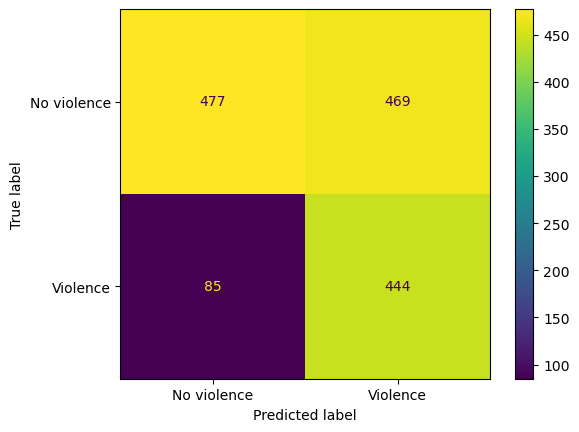

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(groundtruth,relabeled)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No violence', 'Violence'])

disp.plot()

plt.show()

In [31]:
#https://en.wikipedia.org/wiki/Precision_and_recall
#Precision is the the ratio of true positives and false positives,
#recall is the measure of true positives to false negatives

#We can observe that precision is really low for the violence class, but recall is high
#On the other hand, recall is low for the non-violence class, but precision is high
#F1 score is a harmonic mean of precision and recall for each class and it's not impressive
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(groundtruth, relabeled)

(array([0.84875445, 0.48630887]),
 array([0.50422833, 0.83931947]),
 array([0.63262599, 0.61581137]),
 array([946, 529]))

In [35]:
#Let's try to filter out the yes and no answers only from the answers of the model.
subset=[]
indices=[]
ind=0
for i in llm_classification:
    if 'No' in i:
        lab=0
        subset.append(lab)
        indices.append(ind)
    elif 'Yes' in i:
        lab=1
        subset.append(lab)
        indices.append(ind)
    ind+=1

    
relabeled=np.array(subset)    
groundtruth=np.array(df.iloc[indices,2])


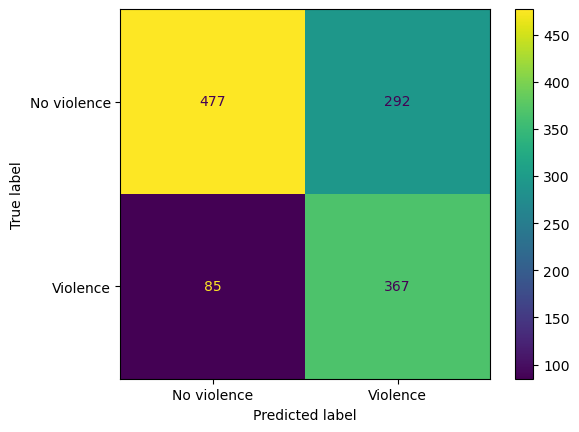

Precision, Recall, F1:  (array([0.84875445, 0.5569044 ]), array([0.62028609, 0.8119469 ]), array([0.71675432, 0.66066607]), array([769, 452]))


In [38]:
def conf_mat_pr_rec(groundtruth,relabeled):
    cm=confusion_matrix(groundtruth,relabeled)


    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No violence', 'Violence'])

    disp.plot()

    plt.show()
    
    print('Precision, Recall, F1: ',precision_recall_fscore_support(groundtruth, relabeled))

conf_mat_pr_rec(groundtruth,relabeled)

In [ ]:
#It looks like it's a bit better.

In [111]:
#Define prompt
template = """
Context: {text} \n\nQuestion: Does the context contain violence? \n\nAnswer:
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)

llm=CerebriumAI(endpoint_url="https://run.cerebrium.ai/flan-t5-xl-webhook/predict")

llm_chain = LLMChain(llm=llm, prompt=prompt)

cerebrum_better_prompt=generate_violence_classifications(llm_chain,df)

In [114]:
cerebrum_better_prompt

['Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Y

In [112]:
#Let's try to filter out the yes and no answers only from the answers of the model.
subset=[]
indices=[]
ind=0
for i in cerebrum_better_prompt:
    if 'No' in i:
        lab=0
        subset.append(lab)
        indices.append(ind)
    elif 'Yes' in i:
        lab=1
        subset.append(lab)
        indices.append(ind)
    ind+=1

    
relabeled=np.array(subset)    
groundtruth=np.array(df.iloc[indices,2])


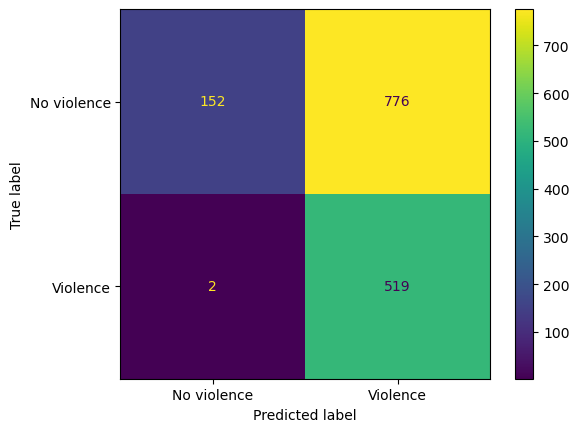

Precision, Recall, F1:  (array([0.98701299, 0.4007722 ]), array([0.1637931 , 0.99616123]), array([0.28096118, 0.5715859 ]), array([928, 521]))


In [113]:
def conf_mat_pr_rec(groundtruth,relabeled):
    cm=confusion_matrix(groundtruth,relabeled)


    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No violence', 'Violence'])

    disp.plot()

    plt.show()
    
    print('Precision, Recall, F1: ',precision_recall_fscore_support(groundtruth, relabeled))

conf_mat_pr_rec(groundtruth,relabeled)

## Let's try OpenAI ChatGPT

In [104]:
#Define prompt
from langchain.llms import OpenAI


import time
template = """
"Please evaluate the following text for the presence of violence, 
and let me know if it contains violence, yes or no: '{text}'."
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

llm = OpenAI(temperature=0.2)

llm_chain = LLMChain(llm=llm, prompt=prompt)

start=time.time()
predictions=generate_violence_classifications(llm_chain,df)
end=time.time()
print('Time taken for inference: ', end-start)

Time taken for inference:  1805.288756608963


In [105]:
predictions

['\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 '\nYes, this text contains violence.',
 '\nNo, this text does not contain violence.',
 '\nYes, this text contains violence.',
 '\nYes, this text contains violence.',
 '\nYes, this text contains violence.',
 '\nYes, this text contains violence.',
 '\nNo, this text does not contain violence.',
 '\nNo, this text does not contain violence.',
 

In [116]:
predictions=pd.Series(predictions)

predictions.to_csv('openai_output.csv')

predictions=pd.read_csv('openai_output.csv')

In [123]:
predictions.iloc[0,1]

'\nNo, this text does not contain violence.'

In [125]:
#Let's try to filter out the yes and no answers only from the answers of the model.
subset=[]
indices=[]
ind=0
for j in range(0,len(predictions)):
    i=predictions.iloc[j,1]
    i=i.strip('\n')
    print(i)
    if 'No' in i:
        lab=0
        subset.append(lab)
        indices.append(ind)
        
    elif 'Yes' in i:
        lab=1
        subset.append(lab)
        indices.append(ind)
        ind+=1
    else:
        print(i)

    
relabeled=np.array(subset)    
groundtruth=np.array(df.iloc[indices,2])

No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
Yes, this text contains violence.
No, this text does not contain violence.
Yes, this text contains violence.
Yes, this text contains violence.
Yes, this text contains violence.
Yes, this text contains violence.
No, this text does not contain violence.
No, this text does not contain violence.
Yes, this text contains violence.
Yes, this text contains violence.
Yes, this text contains violence.
No, this text does not contain 

In [126]:
predictions

,Unnamed: 0,0
0,0,"\nNo, this text does not contain violence."
1,1,"\nNo, this text does not contain violence."
2,2,"\nNo, this text does not contain violence."
3,3,"\nNo, this text does not contain violence."
4,4,"\nNo, this text does not contain violence."
...,...,...
1470,1470,"\nNo, this text does not contain violence."
1471,1471,"\nNo, this text does not contain violence."
1472,1472,"\nNo, this text does not contain violence."
1473,1473,"\nNo, this text does not contain violence."


In [108]:
print(len(groundtruth))
len(df)

1475


1475

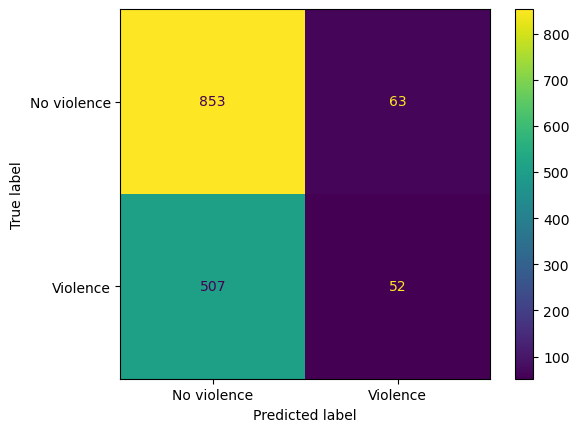

Precision, Recall, F1:  (array([0.62720588, 0.45217391]), array([0.93122271, 0.09302326]), array([0.74956063, 0.15430267]), array([916, 559]))


In [127]:
def conf_mat_pr_rec(groundtruth,relabeled):
    cm=confusion_matrix(groundtruth,relabeled)


    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No violence', 'Violence'])

    disp.plot()

    plt.show()
    
    print('Precision, Recall, F1: ',precision_recall_fscore_support(groundtruth, relabeled))

conf_mat_pr_rec(groundtruth,relabeled)

In [83]:
df.iloc[0,1]

'  June Before the Judges NIL Nonn Presiding Silvia CARTWRIGHT YA Sokhan JeanMarc LAVERGNE THOU Mony YOU Ottara Reserve Claudia FENZ Reserve Trial Chamber Greffiers Legal Officers DUCH Phary SE Kolvuthy LIM SuyHong Natacha WEXELSRISER Matteo CRIPPA For the Office of the CoProsecutors William SMITH YET Chakriya PICH Sambath Zachery LAMPEL PAK Chanlino The Accused KAING Guek Eav Lawyers for the Accused KAR Savuth MariePaule CANIZARES Heleyn UÑAC Lawyers for the Civil Parties KIM Mengkhy KONG Pisey TY Srinna HONG Kimsuon MOCH Sovannary YUNG Phanit Silke STUDZINSKY Alain WERNER For Court Management Section KAUV Keoratanak CmúCa Extraordinary Chambers in the Courts of Cambodia Chambres Extraordinaires au sein des Tribunaux Cambodgiens i I N D E X WITNESSES MR VANN NATH Questioning by Mr President commences pa ge Questioning by Judge Lavergne commences Questioning by Judge Ya Sokhan commences Questioning by Judge Thou Mony commences Questioning by Mr Yet Chakriya commences Questioning by Mr 

In [84]:
df.iloc[:,2]

0       0
1       0
2       0
3       0
4       0
       ..
1470    0
1471    0
1472    1
1473    0
1474    0
Name: label, Length: 1475, dtype: int64

In [85]:
df.iloc[1472,1]

'five days from morning to night Your testimony here before the Trial Chamber was that the shooting went down night and day day and night for five days Are we to understand that the investigators who took your statement incorrectly noted your what A When I made statement to the investigators I told them that they were shooting all the time I do not know why they said that they were shooting at night If there had been no shooting the refugees could have escaped because there were people keeping watch over the refugees I dont understand Q You said that if they didnt shoot at night some people could have escaped I will read the following lines â€œSome People succeeded to escape at night I think that there is a mistake in the translation between the French and the English but as the original was English we can conclude that a word is missing in the French translation But which sentence where MR PRESIDENT MR BOULÃ‰ MR MOSES succeeded to escape at night I dont understand what is happening no

In [128]:
relabeled[1472]

0

In [131]:
#Define prompt
from langchain.llms import OpenAI


import time
template = """
"Please evaluate the following text for the presence of violence, 
and let me know if it contains violence, yes or no:

Example of a text containing violence:
'{violent_text}'

Example of a text not containing violence:
'{non_violent_text}'

The actual text to be classified: 
'{text}''
"""


prompt = PromptTemplate(
    input_variables=["text","violent_text","non_violent_text"],
    template=template,
)
os.environ["OPENAI_API_KEY"] = OPEN_API_KEY

llm = OpenAI(temperature=0.2)

llm_chain = LLMChain(llm=llm, prompt=prompt)

def generate_violence_classifications(llm_chain,df):
    llm_classification=[]
    for i in range(0,len(df)):
        classific=llm_chain({'text':df.iloc[i,1],'violent_text':df.iloc[1472,1],
                            'non_violent_text':df.iloc[0,1]})['text']
        llm_classification.append(classific)
    return llm_classification

start=time.time()
predictions=generate_violence_classifications(llm_chain,df)
end=time.time()
print('Time taken for inference: ', end-start)

Time taken for inference:  1972.4125199317932


In [132]:
predictions=pd.Series(predictions)

predictions.to_csv('openai_output_examples.csv')

In [133]:
predictions=pd.read_csv('openai_output_examples.csv')

In [138]:
#Let's try to filter out the yes and no answers only from the answers of the model.
subset=[]
indices=[]
ind=0
for j in range(0,len(predictions)):
    i=predictions.iloc[j,1]
    i=i.strip('\n')
    print(i)
    if 'No' in i or 'not' in i:
        lab=0
        subset.append(lab)
        indices.append(ind)
        
    elif 'Yes' in i:
        lab=1
        subset.append(lab)
        indices.append(ind)
        ind+=1
    else:
        print(i)

    
relabeled=np.array(subset)    
groundtruth=np.array(df.iloc[indices,2])

No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
This text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
This text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not contain violence.
No, this text does not c

In [142]:
len(subset)

1473

In [141]:
relabeled[relabeled==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

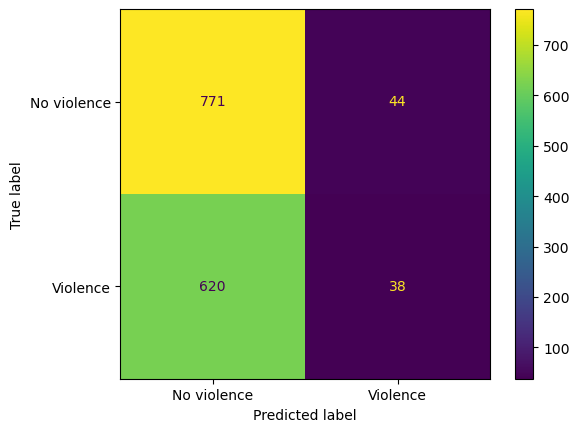

Precision, Recall, F1:  (array([0.5542775 , 0.46341463]), array([0.94601227, 0.05775076]), array([0.69900272, 0.1027027 ]), array([815, 658]))


In [140]:
def conf_mat_pr_rec(groundtruth,relabeled):
    cm=confusion_matrix(groundtruth,relabeled)


    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No violence', 'Violence'])

    disp.plot()

    plt.show()
    
    print('Precision, Recall, F1: ',precision_recall_fscore_support(groundtruth, relabeled))

conf_mat_pr_rec(groundtruth,relabeled)